In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

In [ ]:
DDoS = pd.read_csv('/content/dataset_sdn.csv')

In [ ]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [ ]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [ ]:
X=DDoS[['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
#Transform the data
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())


             P1            P2
0 -2.208865e+11  4.733184e+07
1 -4.088650e+10 -1.100853e+08
2 -1.208865e+11 -1.019126e+08
3 -1.208865e+11 -1.019126e+08
4 -1.208865e+11 -1.019123e+08


In [ ]:
model=DBSCAN(eps=0.5,min_samples=10).fit(X_principal)

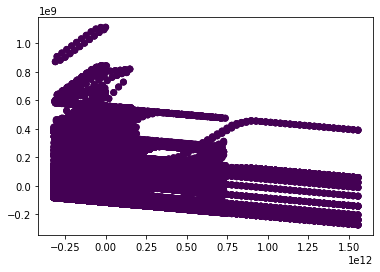

In [ ]:
colors=model.labels_
plt.scatter(X_principal['P1'], X_principal['P2'], c=colors)

In [ ]:
outliers=DDoS[model.labels_==1]
print(outliers)

[[-1.20886500e+11 -1.01912593e+08]
 [-1.20886500e+11 -1.01912632e+08]
 [-1.20886500e+11 -1.01912335e+08]
 [-1.20886500e+11 -1.01912552e+08]
 [-1.20886500e+11 -1.01912335e+08]
 [-1.20886500e+11 -1.01912746e+08]
 [-1.20886500e+11 -1.01912335e+08]
 [-1.20886500e+11 -1.01912157e+08]
 [-1.20886500e+11 -1.01912157e+08]
 [-1.20886500e+11 -1.01912593e+08]
 [-1.20886500e+11 -1.01912612e+08]
 [-1.20886500e+11 -1.01912335e+08]
 [-1.20886500e+11 -1.01912442e+08]
 [-1.20886500e+11 -1.01912157e+08]
 [-1.20886500e+11 -1.01912548e+08]
 [-1.20886500e+11 -1.01912503e+08]
 [-1.20886500e+11 -1.01912335e+08]
 [-1.20886500e+11 -1.01912612e+08]
 [-1.20886500e+11 -1.01912157e+08]
 [-1.20886500e+11 -1.01912157e+08]
 [-1.20886500e+11 -1.01912552e+08]
 [-1.20886500e+11 -1.01912503e+08]
 [-1.20886500e+11 -1.01912528e+08]]


In [ ]:
labels = model.fit_predict(X_principal)

In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(X_principal,labels))

-0.3992365429798315
